In [ ]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas as pd 
import numpy as np 
#from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

 

In [ ]:
dataset=pd.read_csv("/content/train_s3TEQDk.csv")
#profile=ProfileReport(dataset)
#profile.to_widgets()

In [ ]:
colunms=['ID','Vintage','Is_Active',]
dataset=dataset.dropna()

[]

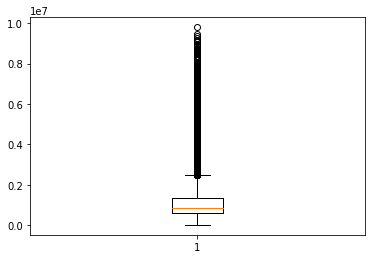

In [ ]:
plt.boxplot(dataset['Avg_Account_Balance'])
plt.plot()

In [ ]:
for col in colunms:
  del dataset[col]
dataset.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Credit_Product,Avg_Account_Balance,Is_Lead
0,Female,73.0,RG268,Other,X3,No,1045696.0,0.0
1,Female,30.0,RG277,Salaried,X1,No,581988.0,0.0
2,Female,56.0,RG268,Self_Employed,X3,No,1484315.0,0.0
3,Male,34.0,RG270,Salaried,X1,No,470454.0,0.0
4,Female,30.0,RG282,Salaried,X1,No,886787.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler
normaliser=StandardScaler()
dataset['Age']=normaliser.fit_transform(dataset[['Age']])
dataset['Avg_Account_Balance']=normaliser.fit_transform(dataset[['Avg_Account_Balance']])

In [ ]:
dataset.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Credit_Product,Avg_Account_Balance,Is_Lead
0,Female,2.028012,RG268,Other,X3,No,-0.081403,0.0
1,Female,-0.861230,RG277,Salaried,X1,No,-0.633826,0.0
2,Female,0.885754,RG268,Self_Employed,X3,No,0.441131,0.0
3,Male,-0.592464,RG270,Salaried,X1,No,-0.766699,0.0
4,Female,-0.861230,RG282,Salaried,X1,No,-0.270714,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset['Region_Code']=encoder.fit_transform(dataset[['Region_Code']])
dataset['Gender']=encoder.fit_transform(dataset[['Gender']])
dataset['Credit_Product']=encoder.fit_transform(dataset[['Credit_Product']])
dataset.head()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Gender,Age,Region_Code,Occupation,Channel_Code,Credit_Product,Avg_Account_Balance,Is_Lead
0,0,2.028012,18,Other,X3,0,-0.081403,0.0
1,0,-0.861230,27,Salaried,X1,0,-0.633826,0.0
2,0,0.885754,18,Self_Employed,X3,0,0.441131,0.0
3,1,-0.592464,20,Salaried,X1,0,-0.766699,0.0
4,0,-0.861230,32,Salaried,X1,0,-0.270714,0.0


In [ ]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [ ]:
dataset.head()

,Gender,Age,Region_Code,Credit_Product,Avg_Account_Balance,Is_Lead,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,0,2.028012,18,0,-0.081403,0.0,1,0,0,0,1,0
1,0,-0.861230,27,0,-0.633826,0.0,0,1,0,0,0,0
2,0,0.885754,18,0,0.441131,0.0,0,0,1,0,1,0
3,1,-0.592464,20,0,-0.766699,0.0,0,1,0,0,0,0
4,0,-0.861230,32,0,-0.270714,0.0,0,1,0,0,0,0


In [ ]:
y=dataset['Is_Lead']
del dataset['Is_Lead']
x=dataset.copy()
x.head()

,Gender,Age,Region_Code,Credit_Product,Avg_Account_Balance,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,0,2.028012,18,0,-0.081403,1,0,0,0,1,0
1,0,-0.861230,27,0,-0.633826,0,1,0,0,0,0
2,0,0.885754,18,0,0.441131,0,0,1,0,1,0
3,1,-0.592464,20,0,-0.766699,0,1,0,0,0,0
4,0,-0.861230,32,0,-0.270714,0,1,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
print(dt.score(x_test,y_test))

0.7768664084453558


In [ ]:
from xgboost import XGBClassifier
dt=XGBClassifier(objective='binary:logistic',learning_rate=0.01,n_estimators=250,booster='gbtree')
dt.fit(x_train,y_train)
print(dt.score(x_test,y_test))


0.8555479608111187


In [ ]:
data=pd.read_csv('/content/test_mSzZ8RL.csv')
data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [ ]:
id=[data['ID']]
print(data['Credit_Product'].value_counts())

No     61608
Yes    31182
Name: Credit_Product, dtype: int64


In [ ]:
for col in colunms:
   del data[col]
data.fillna('Yes',inplace=True,axis=1)


data.head()


,Gender,Age,Region_Code,Occupation,Channel_Code,Credit_Product,Avg_Account_Balance
0,Male,29,RG254,Other,X1,Yes,742366
1,Male,43,RG268,Other,X2,Yes,925537
2,Male,31,RG270,Salaried,X1,No,215949
3,Male,29,RG272,Other,X1,No,868070
4,Female,29,RG270,Other,X1,No,657087


In [ ]:
data['Region_Code']=encoder.fit_transform(data[['Region_Code']])
data['Gender']=encoder.fit_transform(data[['Gender']])
data['Credit_Product']=encoder.fit_transform(data[['Credit_Product']])

data['Age']=normaliser.fit_transform(data[['Age']])
data['Avg_Account_Balance']=normaliser.fit_transform(data[['Avg_Account_Balance']])


data=pd.get_dummies(data,drop_first=True)
data.head()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Gender,Age,Region_Code,Credit_Product,Avg_Account_Balance,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,1,-0.999878,4,1,-0.452333,1,0,0,0,0,0
1,1,-0.058563,18,1,-0.240878,1,0,0,1,0,0
2,1,-0.865404,20,0,-1.060037,0,1,0,0,0,0
3,1,-0.999878,22,0,-0.307219,1,0,0,0,0,0
4,0,-0.999878,20,0,-0.550781,1,0,0,0,0,0


In [ ]:
x.head()

,Gender,Age,Region_Code,Credit_Product,Avg_Account_Balance,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,0,2.028012,18,0,-0.081403,1,0,0,0,1,0
1,0,-0.861230,27,0,-0.633826,0,1,0,0,0,0
2,0,0.885754,18,0,0.441131,0,0,1,0,1,0
3,1,-0.592464,20,0,-0.766699,0,1,0,0,0,0
4,0,-0.861230,32,0,-0.270714,0,1,0,0,0,0


In [ ]:
xgb_pred=dt.predict_proba(data)

In [ ]:
xgb_pred

array([[0.88620394, 0.11379608],
       [0.6323394 , 0.36766058],
       [0.907758  , 0.09224202],
       ...,
       [0.907758  , 0.09224202],
       [0.86626613, 0.13373388],
       [0.907758  , 0.09224202]], dtype=float32)

In [ ]:
xgb_submission=pd.DataFrame(id)
xgb_submission=xgb_submission.transpose()
xgb_submission.head()


,ID
0,VBENBARO
1,CCMEWNKY
2,VK3KGA9M
3,TT8RPZVC
4,SHQZEYTZ


In [ ]:
xgb_submission['Is_Lead']=xgb_pred[:,1]
xgb_submission.head(20)

,ID,Is_Lead
0,VBENBARO,0.113796
1,CCMEWNKY,0.367661
2,VK3KGA9M,0.092242
3,TT8RPZVC,0.064899
4,SHQZEYTZ,0.064899
5,MZZAQMPT,0.133734
6,Y88TW36I,0.133734
7,3UGOAQNU,0.092242
8,VVUKMUJT,0.841954
9,9R363ZXS,0.367273


In [ ]:
xgb_submission.to_csv('Xbg_submission_final.csv',index=False)